<a href="https://colab.research.google.com/github/bahmanravaei/tutorial-for-ML/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

## Ordinary least squares (OLS) Regression

**statsmodels module**

In [1]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

dat = sm.datasets.get_rdataset("Guerry", "HistData").data


In [2]:
model = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           1.90e-08
Time:                        14:48:03   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

**sci-kit learn package**

In [3]:
from sklearn import linear_model
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
reg = linear_model.LinearRegression()
X,y=load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y)

model=reg.fit(X_train,y_train)

print(model)

LinearRegression()


In [4]:
# R2 scores

r2_trains = model.score(X_train, y_train)
r2_tests = model.score(X_test, y_test)
print(r2_trains)
print(r2_tests)

0.5091989270228584
0.5278755323845118


In [5]:
from sklearn.metrics import r2_score
print(r2_score(y_test,model.predict(X_test)))

0.5278755323845118


##  Ridge Regression

Regularisaton is an important concept used in Ridge Regression as well as the next LASSO regression. Ridge regression uses regularisation which adds a penalty parameter to a variable when it has a large variation. Regularisation prevents overfitting by restricting the model, thus lowering its complexity.

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler

#### TRAIN-TEST SPLIT ####
# X,y=load_diabetes(return_X_y=True)
# X_train, X_test, y_train, y_test = train_test_split(X,y)

#### NORMALIZATION ####
  # using minmaxscaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### CREATE AND FIT MODEL ####
linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Diabetes dataset')
print('ridge regression linear model intercept: {}'
   .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
   .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
   .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
   .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
   .format(np.sum(linridge.coef_ != 0)))

Diabetes dataset
ridge regression linear model intercept: 75.20421489340336
ridge regression linear model coeff:
[ 10.34545224  -8.03000397  65.0432114   44.2176141    0.16282828
  -0.94251056 -33.60482278  25.14279905  46.42269492  25.8332558 ]
R-squared score (training): 0.412
R-squared score (test): 0.426
Number of non-zero features: 10


In [7]:
print(r2_score(y_test,linridge.predict(X_test_scaled)))

0.42615392347356784


In [8]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
  linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
  r2_train = linridge.score(X_train_scaled, y_train)
  r2_test = linridge.score(X_test_scaled, y_test)
  num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
  print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
        r-squared training: {:.2f}, r-squared test: {:.2f}\n'
       .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 10,         r-squared training: 0.51, r-squared test: 0.53

Alpha = 1.00
num abs(coeff) > 1.0: 10,         r-squared training: 0.51, r-squared test: 0.52

Alpha = 10.00
num abs(coeff) > 1.0: 10,         r-squared training: 0.46, r-squared test: 0.48

Alpha = 20.00
num abs(coeff) > 1.0: 8,         r-squared training: 0.41, r-squared test: 0.43

Alpha = 50.00
num abs(coeff) > 1.0: 10,         r-squared training: 0.30, r-squared test: 0.31

Alpha = 100.00
num abs(coeff) > 1.0: 10,         r-squared training: 0.21, r-squared test: 0.21

Alpha = 1000.00
num abs(coeff) > 1.0: 6,         r-squared training: 0.03, r-squared test: 0.02



## LASSO Regression

LASSO refers to Least Absolute Shrinkage and Selection Operator Regression. Like Ridge Regression this also has a regularisation property.

In [9]:
#### IMPORT MODULES ####
import pandas as pd
import numpy as py
from sklearn import preprocessing
from sklearn.linear_model import LassoLarsCV
import sklearn.metrics


In [10]:
# Load Dataset
def load_boston_dataset():
  data_url = "http://lib.stat.cmu.edu/datasets/boston"
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
  X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
  y = raw_df.values[1::2, 2]

  col = ['CRIM','ZN','INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV',]
  
  boston=pd.DataFrame(X,columns=col[:len(col)-1]) 
  boston["MEDV"]=y

  return X, y, boston

X,y,boston=load_boston_dataset() 



In [11]:
#### NORMALIZATION ####
# standardise the means to 0 and standard error to 1
for i in boston.columns[:-1]: # boston.columns[:-1] = dataframe for all features
  boston[i] = preprocessing.scale(boston[i].astype('float64'))
boston.describe()


CRIM            ZN         INDUS          CHAS           NOX  \
count  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02   
mean  -1.123388e-16  7.898820e-17  2.106352e-16 -3.510587e-17 -1.965929e-16   
std    1.000990e+00  1.000990e+00  1.000990e+00  1.000990e+00  1.000990e+00   
min   -4.197819e-01 -4.877224e-01 -1.557842e+00 -2.725986e-01 -1.465882e+00   
25%   -4.109696e-01 -4.877224e-01 -8.676906e-01 -2.725986e-01 -9.130288e-01   
50%   -3.906665e-01 -4.877224e-01 -2.110985e-01 -2.725986e-01 -1.442174e-01   
75%    7.396560e-03  4.877224e-02  1.015999e+00 -2.725986e-01  5.986790e-01   
max    9.933931e+00  3.804234e+00  2.422565e+00  3.668398e+00  2.732346e+00   

                 RM           AGE           DIS           RAD         TAX  \
count  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02  506.000000   
mean  -1.088282e-16 -1.474446e-16 -8.425408e-17 -1.123388e-16    0.000000   
std    1.000990e+00  1.000990e+00  1.000990e+00  1.000990e+00    1.000990   
min   -3.880249e+00 -2.335437e+00 -1.267069e+00 -9.828429e-01   -1.313990   
25%   -5.686303e-01 -8.374480e-01 -8.056878e-01 -6.379618e-01   -0.767576   
50%   -1.084655e-01  3.173816e-01 -2.793234e-01 -5.230014e-01   -0.464673   
75%    4.827678e-01  9.067981e-01  6.623709e-01  1.661245e+00    1.530926   
max    3.555044e+00  1.117494e+00  3.960518e+00  1.661245e+00    1.798194   

            PTRATIO             B         LSTAT        MEDV  
count  5.060000e+02  5.060000e+02  5.060000e+02  506.000000  
mean  -4.212704e-16 -7.442444e-16 -3.089316e-16   22.532806  
std    1.000990e+00  1.000990e+00  1.000990e+00    9.197104  
min   -2.707379e+00 -3.907193e+00 -1.531127e+00    5.000000  
25%   -4.880391e-01  2.050715e-01 -7.994200e-01   17.025000  
50%    2.748590e-01  3.811865e-01 -1.812536e-01   21.200000  
75%    8.065758e-01  4.336510e-01  6.030188e-01   25.000000  
max    1.638828e+00  4.410519e-01  3.548771e+00   50.000000

In [12]:
#### TRAIN TEST SPLIT ####
train_feature, test_feature, train_target, test_target = train_test_split(X, y, random_state=123, test_size=0.2)

print (train_feature.shape)
print (test_feature.shape)


(404, 13)
(102, 13)


In [13]:
#### CREATE MODEL ####
# Fit the LASSO LAR regression model
# cv=10; use k-fold cross validation
# precompute; True=model will be faster if dataset is large
model=LassoLarsCV(cv=10, precompute=False)

In [14]:
#### FIT MODEL ####
model = model.fit(train_feature,train_target)
print (model)

LassoLarsCV(cv=10, precompute=False)


In [15]:
print(boston.columns[:13])

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [16]:
#### ANALYSE COEFFICIENTS ####
#Compare the regression coefficients, and see which one LASSO removed.
#LSTAT is the most important predictor, followed by RM, DIS, and RAD. AGE is removed by LASSO

boston=pd.DataFrame(model.coef_, index=boston.columns[:13])
boston.sort_values(by=0,ascending=False)

0
RM        4.319684
CHAS      1.269541
RAD       0.284522
INDUS     0.066949
ZN        0.047503
B         0.007226
AGE      -0.000980
TAX      -0.012753
CRIM     -0.098793
LSTAT    -0.543790
PTRATIO  -0.913488
DIS      -1.365980
NOX     -15.469775

In [17]:
#### SCORE MODEL ####
# MSE from training and test data
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(train_target, model.predict(train_feature))
test_error = mean_squared_error(test_target, model.predict(test_feature))


In [18]:

print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)
# MSE closer to 0 are better
# test dataset is less accurate as expected

training data MSE
20.677107947815138
test data MSE
28.1924857584696


In [19]:
# R-square from training and test data
rsquared_train=model.score(train_feature,train_target)
rsquared_test=model.score(test_feature,test_target)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)
# test data explained 65% of the predictors


training data R-square
0.7559380876016175
test data R-square
0.659246651035409


In [20]:
print(r2_score(test_target,model.predict(test_feature)))

0.659246651035409


## Polynomial Regression

A polynomial regression model is a machine learning model that can capture non-linear relationships between variables by fitting a non-linear regression line, which may not be possible with simple linear regression.
<br><br>
simple linear regression formula: <br>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/441d157d1b9e322b3cf27b721a370be6844d30c8"> <br><br>
In polynomial regression, value of y is modeled as an nth degree polynomial

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/4adbc890e368ce1d9ab28a7b02cb8f454e160686"><br>

<br>Matrix form of polynomial regression <br>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/be5e382ce4da3ac65e0a2e22368414057403b2d9">

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

#Load dataset
X,y,boston=load_boston_dataset() 

# Normal Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

# Polynomial with Ridge Regression
'''Addition of many polynomial features often leads to
overfitting, so we often use polynomial features in combination
with regression that has a regularization penalty, like ridge
regression.'''

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y,
                                                   random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [-1.17735289e-01  4.40174969e-02 -5.76814314e-03  2.39341594e+00
 -1.55894211e+01  3.76896770e+00 -7.03517828e-03 -1.43495641e+00
  2.40081086e-01 -1.12972810e-02 -9.85546732e-01  8.44443453e-03
 -4.99116797e-01]
linear model intercept (b): 36.933
R-squared score (training): 0.770
R-squared score (test): 0.635

Now we transform the original input data to add
polynomial features up to degree 2 (quadratic)

(poly deg 2) linear model coeff (w):
[-1.13008466e+09 -2.47597055e-01 -5.56247242e-02 -6.00954510e+00
  1.70278128e+01 -2.76113267e+01  4.54425139e+00  1.26546224e+00
 -1.05359932e+01  1.14862606e+00  3.86948959e-02  2.41164972e+00
 -2.28166270e-01 -1.49869086e+00 -9.33915641e-04  5.03713300e-01
  5.63594875e-01  1.29796992e+00 -3.61282897e-01  1.69732150e-01
  1.54612354e-03 -1.29862554e-01  5.92890315e-01 -4.88203365e-02
  3.59607087e-01 -1.00569591e-04  1.45278506e-02 -3.18495520e-04
 -2.14046680e-02  5.13205944e-02 -1.72594735e+00 -6.74178948e-02
  2.999205

In [22]:
print(r2_score(y_test,linreg.predict(X_test)))

0.6072823587631445


## Decision Tree Regressor

In [23]:
###### IMPORT MODULES #######
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor


### Load Dataset
X,y,boston=load_boston_dataset()

#### TRAIN TEST SPLIT ####
#train_predictor, y_train, train_target, y_test = \
#train_test_split(X, y, test_size=0.25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print (y_train.shape)
print (X_train.shape)


#### CREATE MODEL ####
TreeR = DecisionTreeRegressor()



#### FIT MODEL ####
model = TreeR.fit(X_train, y_train)
print(model)



#### TEST MODEL ####
predictions = model.predict(X_test)

#### SCORE MODEL ####
print('(Decision Tree Regressor) R-squared score (training): {:.3f}'
     .format(model.score(X_train, y_train)))
print('(Decision Tree Regressor) R-squared score (test): {:.3f}'
     .format(model.score(X_test, y_test)))



(379,)
(379, 13)
DecisionTreeRegressor()
(Decision Tree Regressor) R-squared score (training): 1.000
(Decision Tree Regressor) R-squared score (test): 0.864


In [24]:
print(r2_score(y_test,predictions))

0.8635892063805717


In [25]:

####### FEATURE IMPORTANCE #### ####
f_impt= pd.DataFrame(model.feature_importances_, index=boston.columns[:13])
f_impt = f_impt.sort_values(by=0,ascending=False)
f_impt.columns = ['feature importance']
f_impt

feature importance
LSTAT              0.690275
RM                 0.141394
DIS                0.061531
NOX                0.027721
PTRATIO            0.019467
CRIM               0.015481
TAX                0.013829
B                  0.011290
AGE                0.009477
INDUS              0.005282
ZN                 0.002407
CHAS               0.000958
RAD                0.000890

In [26]:
from six import StringIO

from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())



## Random Forest Regressor

In [27]:
###### IMPORT MODULES #### ###
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics

#### Load boston Dataset
X,y,boston=load_boston_dataset()

#### TRAIN TEST SPLIT ####
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#train_feature, test_feature, train_target, test_target = \
#train_test_split(X, y, test_size=0.2)



#### CREATE MODEL ####
# use 100 decision trees
RF_Regresor = RandomForestRegressor(n_estimators=100, n_jobs=4, verbose=3)



#### FIT MODEL ####
model = RF_Regresor.fit(X_train, y_train)
print (model)


#### TEST MODEL ####
predictions = model.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100building tree 22 of 100
building tree 23 of 100

building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100building tree 30 of 100building tree 31 of 100

building tree 32 of 100

building tree 33 of 100building tree 34 of 100
building tree 35 of 100
building tree 36 of 100

building tree 37 of 100
building tree 38 of 100


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s


building tree 39 of 100building tree 40 of 100

building tree 41 of 100building tree 42 of 100building tree 43 of 100

building tree 44 of 100

building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100building tree 50 of 100building tree 51 of 100

building tree 52 of 100

building tree 53 of 100building tree 54 of 100building tree 55 of 100

building tree 56 of 100

building tree 57 of 100building tree 58 of 100building tree 59 of 100


building tree 60 of 100
building tree 61 of 100building tree 62 of 100building tree 63 of 100

building tree 64 of 100

building tree 65 of 100building tree 66 of 100building tree 67 of 100


building tree 68 of 100building tree 69 of 100
building tree 70 of 100

building tree 71 of 100building tree 72 of 100

building tree 73 of 100building tree 74 of 100

building tree 75 of 100
building tree 76 of 100
building tree 77 of 100building tree 78 of 100
building tree 79 of 100

building tree 80

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [28]:
#### SCORE MODEL ####
print('(Random Forest Regressor) R-squared score (training): {:.3f}'
     .format(model.score(X_train, y_train)))
print('(Random Forest Regressor) R-squared score (test): {:.3f}'
     .format(model.score(X_test, y_test)))


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


(Random Forest Regressor) R-squared score (training): 0.982
(Random Forest Regressor) R-squared score (test): 0.874


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [29]:
####### FEATURE IMPORTANCE #### ####
# rank the importance of features
f_impt= pd.DataFrame(model.feature_importances_, index=boston.columns[:13])
f_impt = f_impt.sort_values(by=0,ascending=False)
f_impt.columns = ['feature importance']
print(f_impt)

         feature importance
LSTAT              0.403677
RM                 0.388227
DIS                0.068769
CRIM               0.042966
NOX                0.019593
TAX                0.018869
PTRATIO            0.015728
B                  0.015706
AGE                0.013740
INDUS              0.006547
RAD                0.003752
ZN                 0.001224
CHAS               0.001200


In [30]:

#### GRAPHS ####

# see how many decision trees are minimally required make the score consistent
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

trees=range(100)
score=np.zeros(100)
r2score=np.zeros(100)

for i in range(len(trees)):
  reg=RandomForestRegressor(n_estimators= i+1)
  model=reg.fit(X_train, y_train)
  score[i]=model.score(X_test, y_test)
  predictions=model.predict(X_test)
  r2score[i]=r2_score(y_test,predictions)


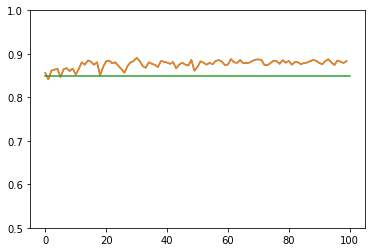

In [31]:
plt.plot(trees,score)
plt.plot(trees,r2score)
plt.ylim(0.5, 1)
plt.plot([0,100],[0.85, 0.85])
# well, seems like more than 15 trees will have a consistent score of 0.85.
# Guess there's no need to have an ensemble of 100 trees!

## Neutral Networks

We will prepare another tutorial for Neural Networks.

# Evaluation of regression

<a href="https://scikit-learn.org/stable/modules/model_evaluation.html"> click here </a>